In [1]:
%matplotlib widget

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from POP import POP
import pickle


In [2]:
fnm = 'img.pkl' # replace with your raw VMI image file
with open(fnm, 'rb') as f:
    img = pickle.load(f)  

Start initialization......
Loading RBFs from RBFs512.pkl......
RBFs loaded.
Continue initialization......
Initialization completed, ready to peel!
Peel...
Peel completed!


/sdf/home/x/xiangli/pop/POP.py:69: RuntimeWarning: invalid value encountered in divide
  self.betas[i] = c_arr_i/c_arr_i[0]


Text(0, 0.5, 'Yield (arb. units)')

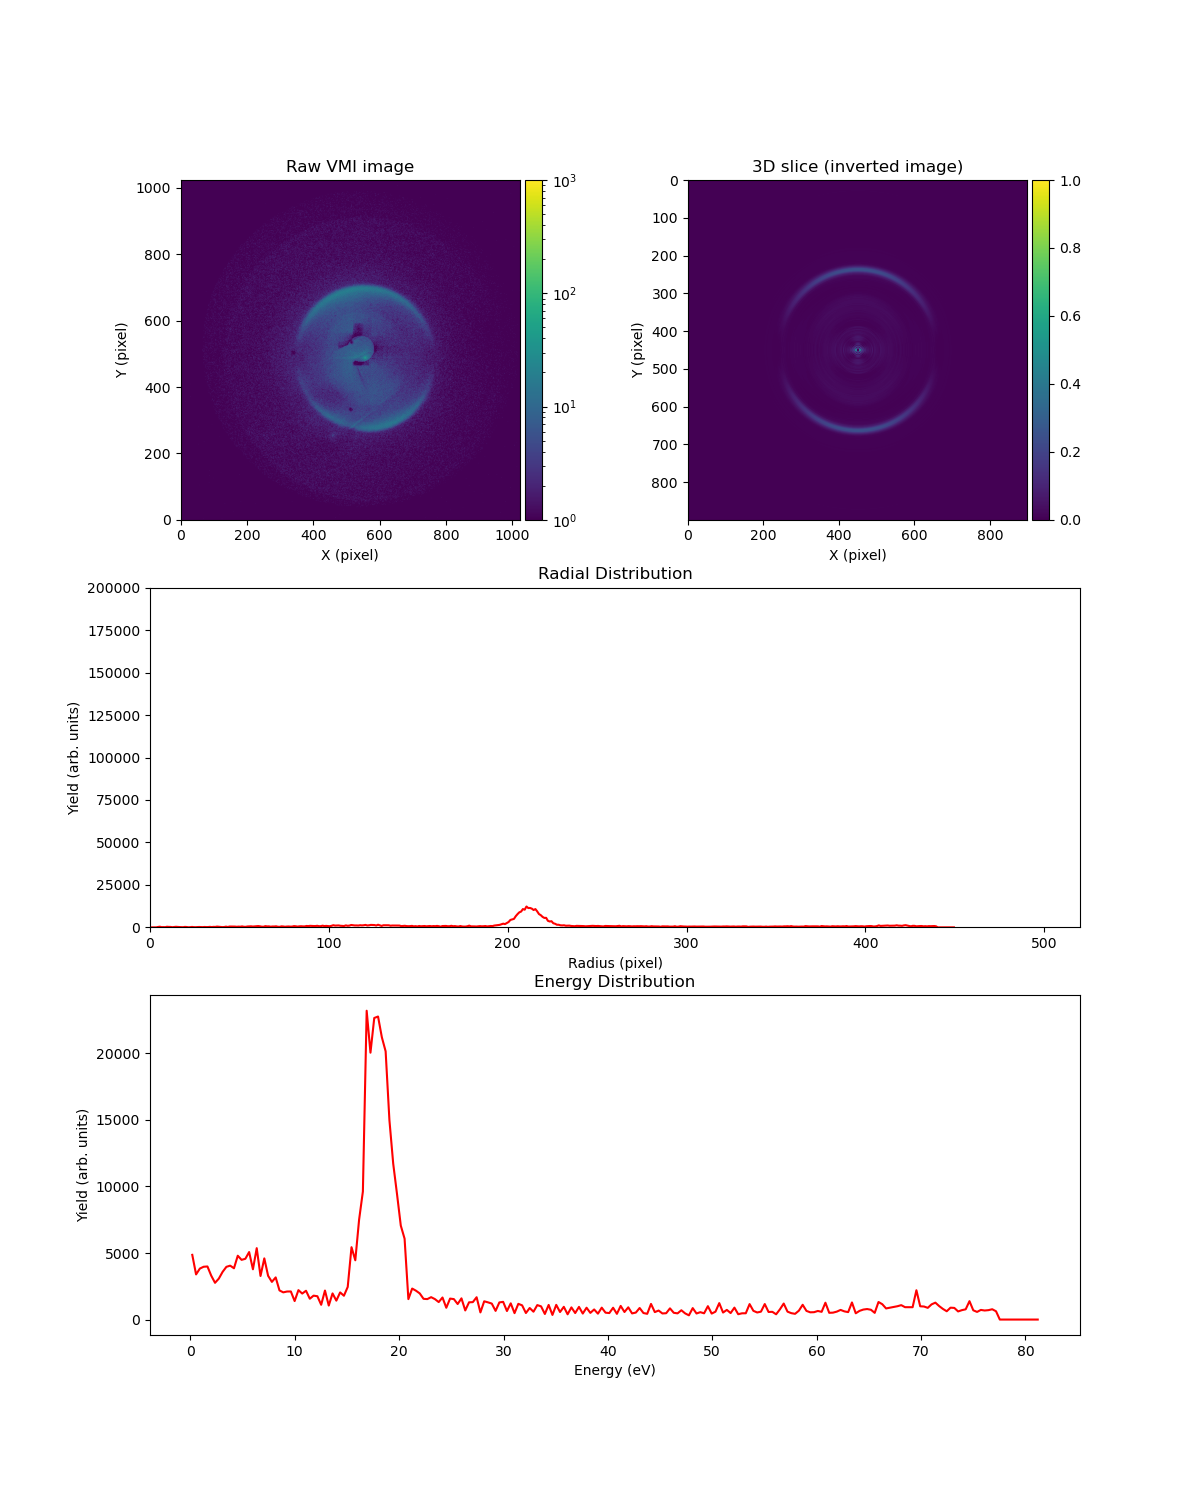

In [3]:
pop = POP(lmax=4,reg=0,alpha=4e-4,img=img,X0=551,Y0=535,Rmax=450,RBFs_fnm='RBFs512.pkl',edge_w=10)    
print('Peel...')
pop.Peel(img)
slice_img = pop.GetSlice()
print('Peel completed!')
rbins,DistR = pop.GetRadialDist()
Ebins,DistE = pop.GetEnergyDist()

fig = plt.figure(figsize=(12,15))
plt.subplot(3,2,1)
im = plt.imshow(img+1,extent=[0,1024,0,1024],norm=LogNorm(vmin=1, vmax=img.max()+1))
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
ax.set_title('Raw VMI image')
ax.set_xlabel('X (pixel)')
ax.set_ylabel('Y (pixel)')

plt.subplot(3,2,2)
im = plt.imshow(slice_img)
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
ax.set_title('3D slice (inverted image)')
ax.set_xlabel('X (pixel)')
ax.set_ylabel('Y (pixel)')

plt.subplot(3,1,2)
plt.plot((rbins[1:]+rbins[:-1])/2,DistR,'r')
plt.xlim([0,520])
plt.ylim([0,2e5])
plt.title('Radial Distribution')
plt.xlabel('Radius (pixel)')
plt.ylabel('Yield (arb. units)')

plt.subplot(3,1,3)
plt.plot((Ebins[1:]+Ebins[:-1])/2,DistE,'r')
#plt.xlim([0,520])
#plt.ylim([0,2e5])
plt.title('Energy Distribution')
plt.xlabel('Energy (eV)')
plt.ylabel('Yield (arb. units)')